## 0. 데이터 및 모델 로딩

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)

from sklearn.tree import DecisionTreeClassifier
titanic = pd.read_csv('data/titanic.csv')
x = titanic.drop(columns='Survived')
y = titanic['Survived']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,8,2


## 1. Hold-out Test

**주요 인자**
- test_size : 테스트셋의 비율(default=0.25)
- shuffle : 무작위 샘플링 여부(default=True)
- stratify : 층화표본 추출(default=None)
- random_state : 난수표 지정(default=None)

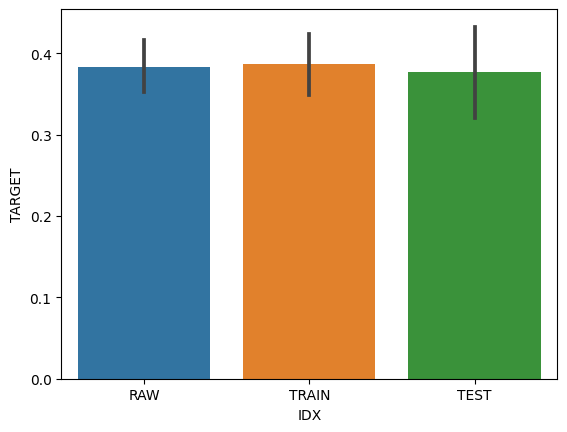

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

g_data = pd.concat([pd.DataFrame({'IDX':'RAW', 'TARGET': y}),
           pd.DataFrame({'IDX':'TRAIN', 'TARGET': y_train}),
           pd.DataFrame({'IDX':'TEST', 'TARGET': y_test})])

sns.barplot(data=g_data, x='IDX', y='TARGET');

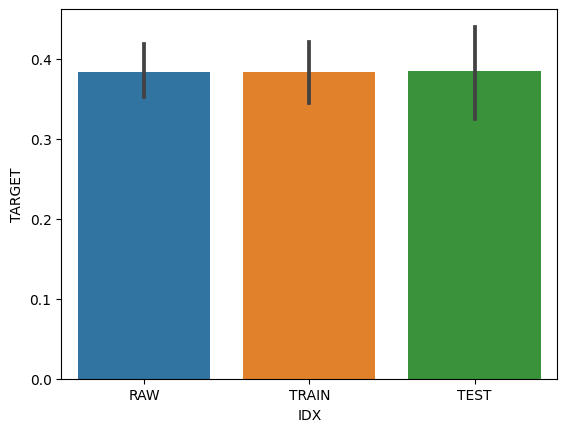

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)
g_data = pd.concat([pd.DataFrame({'IDX':'RAW', 'TARGET': y}),
           pd.DataFrame({'IDX':'TRAIN', 'TARGET': y_train}),
           pd.DataFrame({'IDX':'TEST', 'TARGET': y_test})])
sns.barplot(data=g_data, x='IDX', y='TARGET');

## 2. K-Fold

**기본 K-fold 주요 인자**
- n_splits : K개수 (default=5)
- shuffle : 무작위 샘플링 여부 (default=False)
- random_state : 난수표 지정(default=None)

Fold 0:
  Train: index=[ 0  1  2  3  4  5  7  8  9 10]
  Test:  index=[ 6 11 13 18 26 27 39 44 48 50]
Fold 1:
  Train: index=[ 0  2  3  4  6  7  8 10 11 12]
  Test:  index=[ 1  5  9 16 21 23 30 33 35 36]
Fold 2:
  Train: index=[ 0  1  2  4  5  6  8  9 10 11]
  Test:  index=[ 3  7 12 14 19 22 25 34 46 47]
Fold 3:
  Train: index=[ 0  1  2  3  4  5  6  7  9 10]
  Test:  index=[ 8 15 24 28 38 40 42 43 59 63]
Fold 4:
  Train: index=[ 1  3  5  6  7  8  9 11 12 13]
  Test:  index=[ 0  2  4 10 17 20 29 31 32 37]


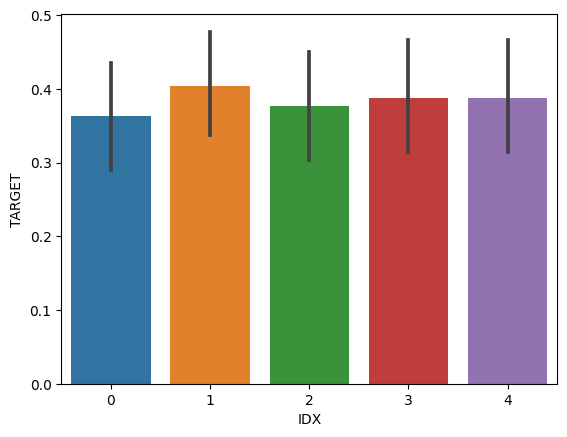

In [21]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
g_data = []

for i, (train_idx, test_idx) in enumerate(kf.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_idx[:10]}")
    print(f"  Test:  index={test_idx[:10]}")
    g_data.append(pd.DataFrame({'IDX':i, 'TARGET':y.iloc[test_idx]}))

g_data = pd.concat(g_data)

sns.barplot(data=g_data, x='IDX', y='TARGET');


**층화 K-fold 주요 인자**
- n_splits : K개수 (default=5)
- shuffle : 무작위 샘플링 여부 (default=False)
- random_state : 난수표 지정(default=None)

Fold 0:
  Train: index=[0 1 2 3 4 5 6 7 8 9]
  Test:  index=[18 26 27 30 32 33 34 35 37 40]
Fold 1:
  Train: index=[ 0  1  2  3  4  8  9 10 13 14]
  Test:  index=[ 5  6  7 11 12 15 20 22 41 44]
Fold 2:
  Train: index=[ 0  2  3  4  5  6  7 10 11 12]
  Test:  index=[ 1  8  9 17 23 24 28 29 38 43]
Fold 3:
  Train: index=[ 0  1  2  3  5  6  7  8  9 11]
  Test:  index=[ 4 10 13 14 19 25 36 52 58 60]
Fold 4:
  Train: index=[ 1  4  5  6  7  8  9 10 11 12]
  Test:  index=[ 0  2  3 16 21 31 39 42 56 64]


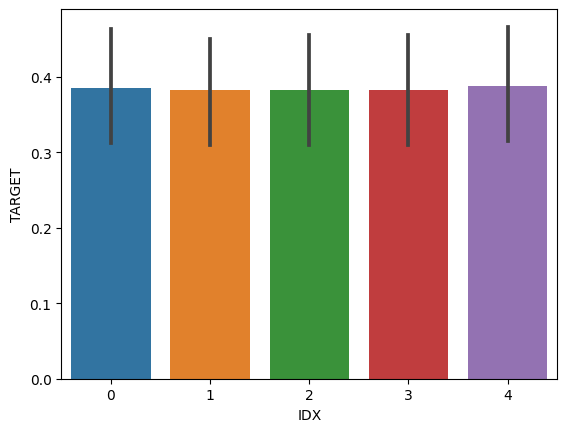

In [22]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True)
g_data = []
for i, (train_idx, test_idx) in enumerate(kf.split(x,y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_idx[:10]}")
    print(f"  Test:  index={test_idx[:10]}")
    g_data.append(pd.DataFrame({'IDX':i, 'TARGET':y.iloc[test_idx]}))
g_data = pd.concat(g_data)
sns.barplot(data=g_data, x='IDX', y='TARGET');


## 3. Boostrap

In [30]:
from sklearn.utils import resample
boot = resample(x, replace=True, n_samples=100)
boot

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
165,3,1,9.000000,0,2,20.5250,8,2
761,3,1,41.000000,0,0,7.1250,8,2
431,3,0,29.699118,1,0,16.1000,8,2
887,1,0,19.000000,0,0,30.0000,1,2
376,3,0,22.000000,0,0,7.2500,8,2
...,...,...,...,...,...,...,...,...
496,1,0,54.000000,1,0,78.2667,3,0
514,3,1,24.000000,0,0,7.4958,8,2
289,3,0,22.000000,0,0,7.7500,8,1
452,1,1,30.000000,0,0,27.7500,2,0


In [31]:
titanic.loc[boot.index]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
165,1,3,1,9.000000,0,2,20.5250,8,2
761,0,3,1,41.000000,0,0,7.1250,8,2
431,1,3,0,29.699118,1,0,16.1000,8,2
887,1,1,0,19.000000,0,0,30.0000,1,2
376,1,3,0,22.000000,0,0,7.2500,8,2
...,...,...,...,...,...,...,...,...,...
496,1,1,0,54.000000,1,0,78.2667,3,0
514,0,3,1,24.000000,0,0,7.4958,8,2
289,1,3,0,22.000000,0,0,7.7500,8,1
452,0,1,1,30.000000,0,0,27.7500,2,0


In [32]:
titanic.drop(index=boot.index)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,8,2
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,8,2
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,8,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.000000,0,5,29.1250,8,1
886,0,2,1,27.000000,0,0,13.0000,8,2
888,0,3,0,29.699118,1,2,23.4500,8,2
889,1,1,1,26.000000,0,0,30.0000,2,0


## 4. Cross Validation

**주요 인자**
- estimator : 사용 알고리즘
- X : 입력 데이터
- y : 목표 데이터
- groups : 사전에 지정된 그룹이 있는 경우 사용 (default=None)
- scoring : 평가 지표 ([The scoring parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter))
- cv : K 개수 (default=5) : 층화표본추출을 기본으로 사용
- n_jobs : 병렬 CPU 사용 (default=None) : -1 지정시 모든 코어 사용
- return_train_score : trainset에 대한 평가 결과 반환 (default=False)
- return_estimator : 각 Fold별 학습 모델 반환 (default=False)

In [33]:
from sklearn.model_selection import cross_validate
dt = DecisionTreeClassifier()
cv_result = cross_validate(dt, x, y, scoring='accuracy', cv=5)
print(cv_result.keys())

dict_keys(['fit_time', 'score_time', 'test_score'])


In [34]:
cv_result['test_score']

array([0.72625698, 0.76966292, 0.80898876, 0.78651685, 0.8258427 ])

In [36]:
dt = DecisionTreeClassifier()
cv_result = cross_validate(dt, x, y, scoring='accuracy', cv=5, return_train_score=True)
print(cv_result.keys())

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


In [37]:
cv_result['train_score'].mean()

0.9882152481207747

In [38]:
cv_result['test_score'].mean()

0.7890402360178269

## 5. 모델 저장

In [39]:
from sklearn.model_selection import cross_validate
dt = DecisionTreeClassifier()
cv_result = cross_validate(dt, x, y, cv=5, scoring='accuracy', return_train_score=True, return_estimator=True)
print(cv_result.keys())

dict_keys(['fit_time', 'score_time', 'estimator', 'test_score', 'train_score'])


In [40]:
best_model = cv_result['estimator'][np.argmax(cv_result['test_score'])]

In [42]:
best_model.predict(x_test)

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0])

In [43]:
joblib.dump({'titanic':titanic, 'dt':best_model}, 
             'data/titanic.pkl')

['data/titanic.pkl']